# Linear regression
***
Linear regression is a ML method for predicting $Y$ when the response variable is a continuous variable.lets have a look at some linear algebra notation.

In statistics when considering relationships of two or more random variables the models take the form:
$$ Y = f(X,\beta)+\epsilon$$
where,
- $Y$ is the response variable,
- $f$ is some mathematical function,
- $X$ is some matrix predictor variable,
- $\beta$ are model parameters,
- $\epsilon$ is the random error term.

If we assume,
$$Yi = f (X_i , β) + \epsilon_i = β_0 + β_1 X_{1i} + · · · + β_p X_{pi} + \epsilon_i$$

for all $i=1, \dots, n$ A matrix representation of the model is $Y = Z\beta+\epsilon$ where,

$$\begin{align} Y = \begin{bmatrix} Y_1 \\ Y_2 \\ \vdots \\  Y_n\end{bmatrix},  &  Z =  \begin{bmatrix} 1 & X_{11} & \dots & X_{p1} \\ 1 & X_{12} & \dots & X_{p2} \\ \vdots & \vdots &\ddots & \vdots \\  1 & X_{1n} & \dots & X_{pn} \end{bmatrix} \\ \beta = \begin{bmatrix} \beta_1 \\ \beta_2 \\ \vdots \\  \beta_n\end{bmatrix}, &  \epsilon = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\  \epsilon_n\end{bmatrix} \end{align} $$

Note that $Z$ is known as the design matrix and if a model has a constant term we include a column of ones as well as the data matrix $X$. If no constant are included in the model, $Z$ and $X$ are equivalent.

## Linear model
In our search for the line best to fit the data
1. we may have a straight linear regression model:
$$y_i=\alpha + \beta x_i + \epsilon_i$$
2. We may have a Horizontal line
$$y_i = \mu + X Z \epsilon\_ TODO CHecki$$ 
3. or a quadratic model
$$y_i = \alpha + \beta x_i + \gamma x^2_i + \epsilon_i$$



## Class Linear regression

Source: https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/linear_regression.py

The Linear model used for this class is 𝑤𝑥+𝑏
and the loss function used is the hinge loss function

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

from sklearn.model_selection import train_test_split

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

## Boston house prices
The data set being used for our Linear regression will be the boston house prices.Lets have a look at the attributes/features included.
####  Attribute Information

Input features in order:<br>
1. CRIM: per capita crime rate by town<br>
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.<br>
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000 [$/10k]
11. PTRATIO: pupil-teacher ratio by town
12. B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population

##### Output variable:
1. MEDV: Median value of owner-occupied homes in $1000's [k$]

# Representation
***
### Exploratory data analysis

In [40]:
# Load csv file 
df = pd.read_csv('../datasets/boston.csv', index_col=False)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


There are no null values

In [44]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


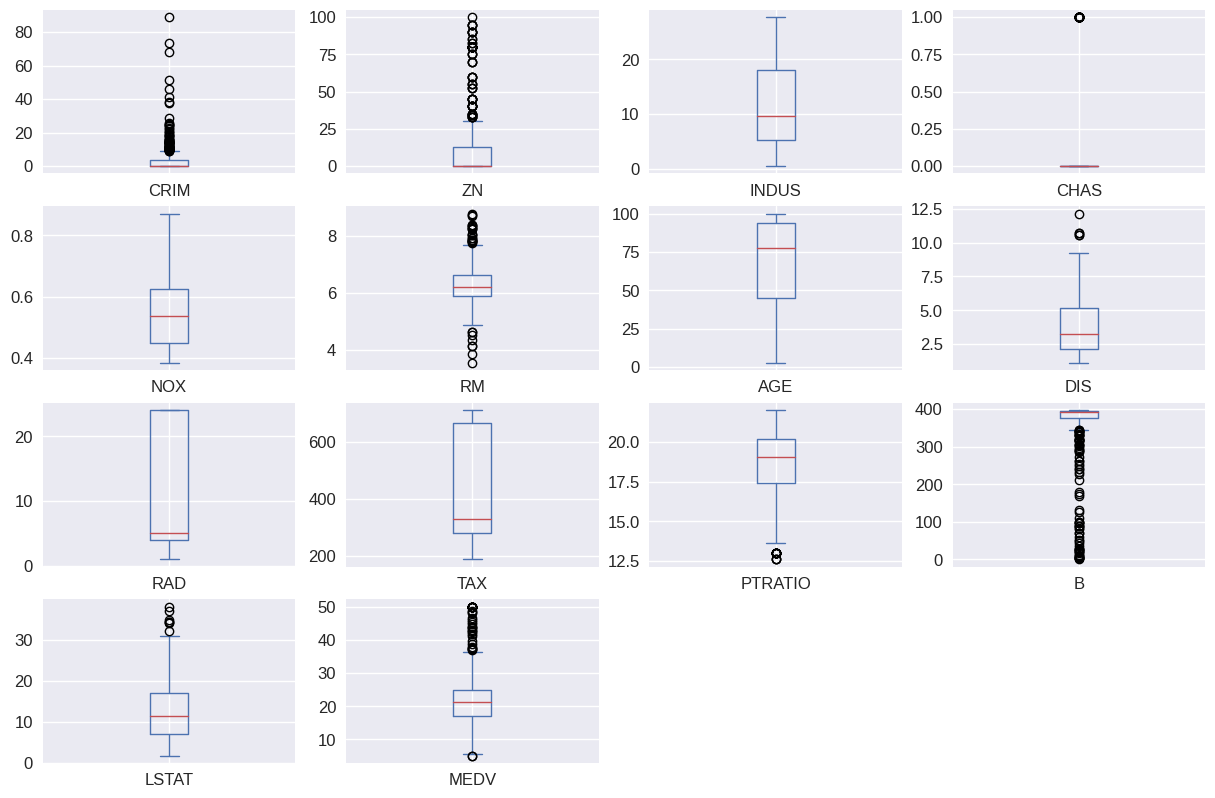

In [45]:
# Use box plot to check the value range and outliers of each feature
data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False, fontsize=12, figsize=(15,20));

There seem to be some outliers so the data will need to be normalised, which will be done before optimisation.

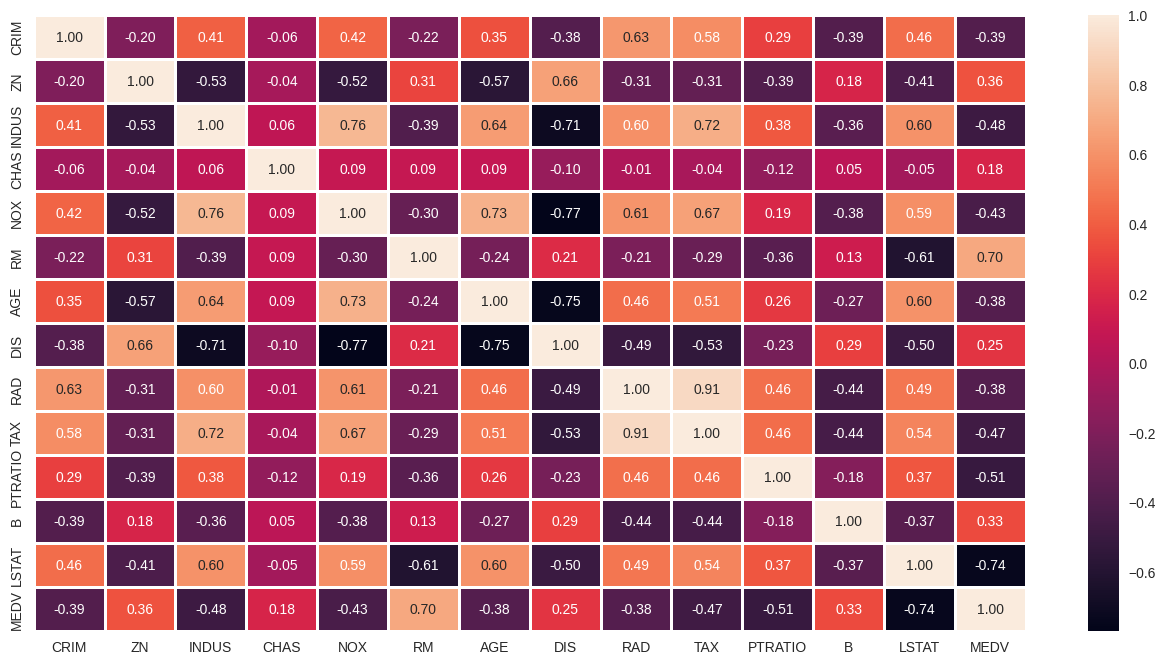

In [46]:
# Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()


In [47]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'MEDV ~ RAD', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     85.91
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           5.47e-19
Time:                        21:20:15   Log-Likelihood:                -1800.4
No. Observations:                 506   AIC:                             3605.
Df Residuals:                     504   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3821      0.562     46.964      0.000      25.278      27.486
RAD           -0.4031      0.043     -9.269      0.000      -0.489      -0.318
==============================================================================
Omnibus:                      149.634   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.231
Skew:                           1.515   Prob(JB):                     9.86e-79
Kurtosis:                       5.803   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# removing "RAD" column

df.drop(columns = 'RAD', axis = 1, inplace = True)

In [2]:
# assign numeriscal label to y
y = df['MEDV']
X = df.drop('MEDV', axis=1)
X.head()

NameError: name 'df' is not defined

<AxesSubplot:>

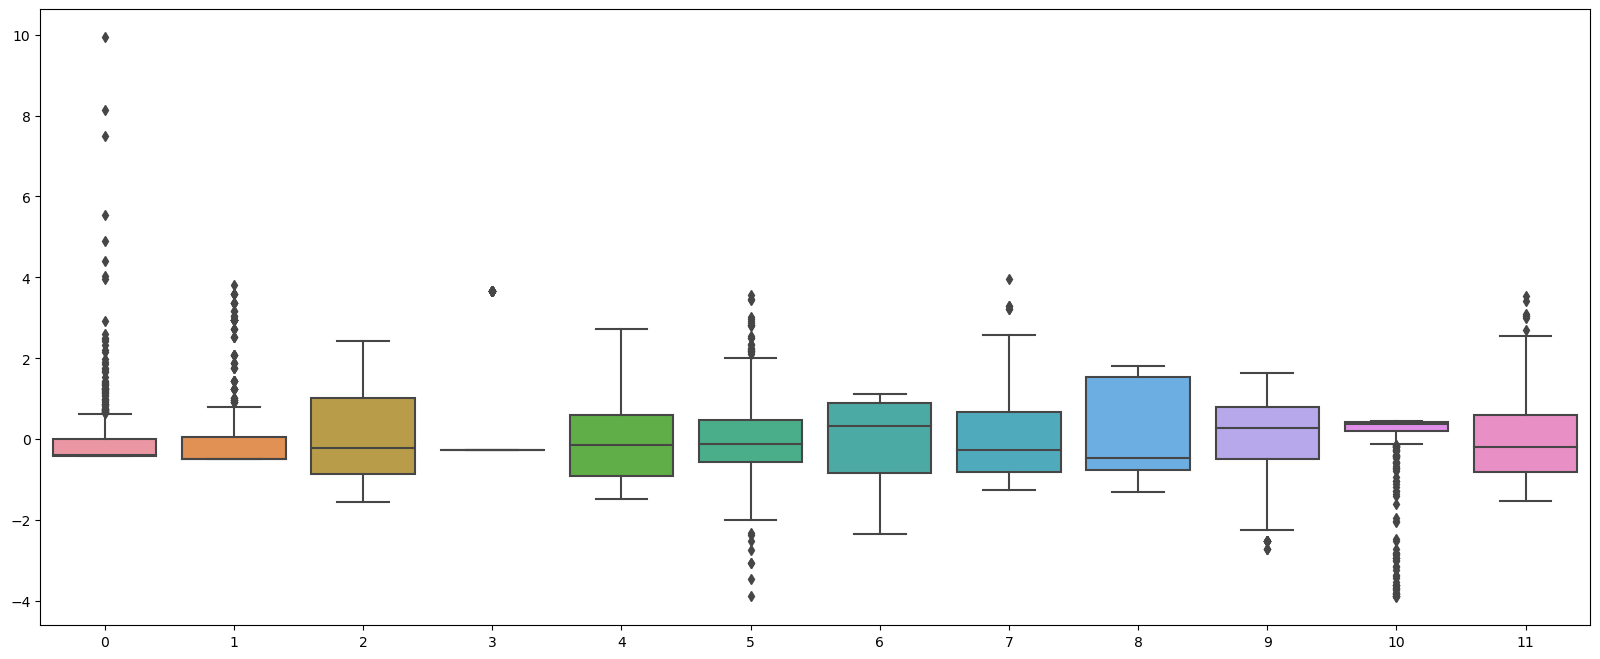

In [23]:
# Normalise the features to use zero mean normalisation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
fig, ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=X, ax=ax)

### Mean Squared Error (MSE)
$$ \text{MSE} = \frac{1}{n}\text{SSE}=\frac{1}{n}\sum^n_{i=1}(\hat y_i - y_i)^2$$

In [25]:
def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

## Optimisation
***

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
OX_train, OX_val, Oy_train, Oy_val = train_test_split(X_train, y_train, test_size=0.2, random_state=3)

In [28]:
learning_rates=[0.1,0.01,0.001,0.0001]

In [29]:
scores = []
for lr in learning_rates:
    linRegressor = LinearRegression(lr)
    linRegressor.fit(OX_train, Oy_train)
    predict = linRegressor.predict(OX_val)
    mse = mean_squared_error(Oy_val, predict)
    scores.append(mse)
    
scores

[30.824353097327418, 31.5172230143307, 123.92744528446245, 499.0495421738606]

In [30]:
model=LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

## Evaluation
***

In [31]:
model=LinearRegression(0.1)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, predict)
print("MSE:", mse)

MSE: 21.01355540532589


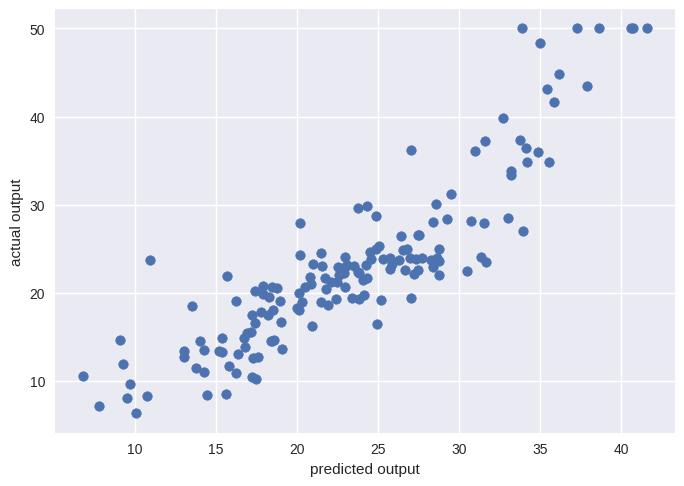

In [37]:
plt.scatter(predict, y_test)
plt.xlabel('predicted output')
plt.ylabel('actual output')
plt.show()